# Premier League 2006-07 to 20017-18 EDA

Premier League is the top level men's football(soccer) league based in England. Each year there are 20 teams that compete for the title. At the end of the season, the top 4 teams qualify for an European championship called UEFA Champions Leauge. The bottom 4 teams are relegated and replaced by EFL Championship(Division 2) teams. 

Each season, 38 games are played, with each facing the other at both home and away fields. 3 points are granted for a win, 1 for draws, and 0 for losses. The aggregated point at the end of the season determine the placing. 

The objective of this analysis is to determine both the winning and losing factors. What factors lead to a higher placing? What factors lead to a lower placing? We aim to discover factors besides simply wins and losses, since they have a direct correlation to finishing place.

Another aspect we'll analyze is has anything changed in the playstyle within the last decade? For example, in many sports, there are conventional styles of play. However, every once in a blue moon, an innovative mind discovers new tactics and strategies that change the game. Through this analysis, I want to see if there have been any clear changes in the statistics. 

I'm an avid Manchester United fan. I know that deserves some banter. Throughout this analysis, I also hope to find indicators that Manchester United is the best team in the Premier League. Maybe I won't...

## Let's now look at the data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv("stats.csv")
df

,team,wins,losses,goals,total_yel_card,total_red_card,total_scoring_att,ontarget_scoring_att,hit_woodwork,att_hd_goal,...,total_cross,corner_taken,touches,big_chance_missed,clearance_off_line,dispossessed,penalty_save,total_high_claim,punches,season
0,Manchester United,28.0,5.0,83.0,60.0,1.0,698.0,256.0,21.0,12.0,...,918.0,258.0,25686.0,NaN,1.0,NaN,2.0,37.0,25.0,2006-2007
1,Chelsea,24.0,3.0,64.0,62.0,4.0,636.0,216.0,14.0,16.0,...,897.0,231.0,24010.0,NaN,2.0,NaN,1.0,74.0,22.0,2006-2007
2,Liverpool,20.0,10.0,57.0,44.0,0.0,668.0,214.0,15.0,8.0,...,1107.0,282.0,24150.0,NaN,1.0,NaN,0.0,51.0,27.0,2006-2007
3,Arsenal,19.0,8.0,63.0,59.0,3.0,638.0,226.0,19.0,10.0,...,873.0,278.0,25592.0,NaN,1.0,NaN,0.0,88.0,27.0,2006-2007
4,Tottenham Hotspur,17.0,12.0,57.0,48.0,3.0,520.0,184.0,6.0,5.0,...,796.0,181.0,22200.0,NaN,2.0,NaN,0.0,51.0,24.0,2006-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Huddersfield Town,9.0,19.0,28.0,62.0,3.0,362.0,109.0,8.0,5.0,...,765.0,165.0,22619.0,21.0,6.0,416.0,2.0,31.0,24.0,2017-2018
236,Swansea City,8.0,21.0,28.0,51.0,1.0,338.0,103.0,8.0,3.0,...,694.0,150.0,22775.0,26.0,1.0,439.0,3.0,44.0,15.0,2017-2018
237,Southampton,7.0,16.0,37.0,63.0,2.0,450.0,145.0,15.0,7.0,...,800.0,227.0,24639.0,37.0,4.0,379.0,1.0,29.0,13.0,2017-2018
238,Stoke City,7.0,19.0,35.0,62.0,1.0,384.0,132.0,8.0,8.0,...,598.0,136.0,20368.0,33.0,3.0,402.0,0.0,27.0,14.0,2017-2018


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   team                  240 non-null    object 
 1   wins                  240 non-null    float64
 2   losses                240 non-null    float64
 3   goals                 240 non-null    float64
 4   total_yel_card        240 non-null    float64
 5   total_red_card        240 non-null    float64
 6   total_scoring_att     240 non-null    float64
 7   ontarget_scoring_att  240 non-null    float64
 8   hit_woodwork          240 non-null    float64
 9   att_hd_goal           240 non-null    float64
 10  att_pen_goal          240 non-null    float64
 11  att_freekick_goal     240 non-null    float64
 12  att_ibox_goal         240 non-null    float64
 13  att_obox_goal         240 non-null    float64
 14  goal_fastbreak        240 non-null    float64
 15  total_offside         2

In [4]:
df.isnull().sum()

team                     0
wins                     0
losses                   0
goals                    0
total_yel_card           0
total_red_card           0
total_scoring_att        0
ontarget_scoring_att     0
hit_woodwork             0
att_hd_goal              0
att_pen_goal             0
att_freekick_goal        0
att_ibox_goal            0
att_obox_goal            0
goal_fastbreak           0
total_offside            0
clean_sheet              0
goals_conceded           0
saves                   20
outfielder_block         0
interception             0
total_tackle             0
last_man_tackle          0
total_clearance          0
head_clearance          20
own_goals                0
penalty_conceded         0
pen_goals_conceded       0
total_pass               0
total_through_ball      20
total_long_balls         0
backward_pass           80
total_cross              0
corner_taken             0
touches                  0
big_chance_missed       80
clearance_off_line       0
d

## We will clean the data and also add draws, points, and rank for analysis

In [5]:
#We will create 2 additional columns for draws and finishing place during the season. This will become important to our analysis.
df['draws'] = ""
df['points'] = ""

for ind in df.index:
    df['draws'][ind] = 38 - df['wins'][ind] - df['losses'][ind] 
    df['points'][ind] = (3*df['wins'][ind]) + df['draws'][ind]

new = df.set_index(['season','team'])


C:\Users\seanp\AppData\Local\Temp\ipykernel_15496\3242150420.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['draws'][ind] = 38 - df['wins'][ind] - df['losses'][ind]
C:\Users\seanp\AppData\Local\Temp\ipykernel_15496\3242150420.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['points'][ind] = (3*df['wins'][ind]) + df['draws'][ind]


In [6]:
#We'll set up a column called "rank" that will determine their finishing place at the end of each season
seasons = ['2006-2007','2007-2008','2008-2009','2009-2010','2010-2011','2011-2012','2012-2013',
          '2013-2014','2014-2015','2015-2016','2016-2017','2017-2018']
new['rank'] = ""

#the ranking goes in descending order. Team that won will have ranking of 20 to find right correlation. 
for season in seasons:
    new.loc[season]['rank'][0:20] = new.loc[season]['points'][20*0:(0*20)+20].rank(method = "max") 

#Changing columns from object type to float to do correlation and other numerical analysis
new['draws'] = new['draws'].astype(float)
new['points'] = new['points'].astype(float)
new['rank'] = new['rank'].astype(float)

C:\Users\seanp\AppData\Local\Temp\ipykernel_15496\1813124358.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.loc[season]['rank'][0:20] = new.loc[season]['points'][20*0:(0*20)+20].rank(method = "max")


In [7]:
#Renaming the columns to a more understandable name
names = ["wins", "losses", "goals", "yellow cards", "red cards","shots", "shots on target", "hit woodwork", 
         "goals from header", "goals from penalty", "goals from free kick", "goals from inside box", "goals from outside box", 
         "goals from counter attack", "offsides", "clean sheets", "goals conceded", "saves", "blocks", "interceptions", "tackles", 
         "last man tackles", "clearances", "headed clearances", "own goals", "penalties conceded", "goals conceded from penalty",
         "passes", "through balls", "long passes", "backwards passes", "crosses", "corners taken",
         "touches", "big chances missed", "clearances off line", "dispossessed", "penalties saved", "high claims", "punches",
         "draws","points","rank"]

new.columns = names

# Hist to check distributionsin the columns


In [28]:
new.head()

wins  losses  goals  yellow cards  red cards  \
season    team                                                              
2006-2007 Manchester United  28.0     5.0   83.0          60.0        1.0   
          Chelsea            24.0     3.0   64.0          62.0        4.0   
          Liverpool          20.0    10.0   57.0          44.0        0.0   
          Arsenal            19.0     8.0   63.0          59.0        3.0   
          Tottenham Hotspur  17.0    12.0   57.0          48.0        3.0   

                             shots  shots on target  hit woodwork  \
season    team                                                      
2006-2007 Manchester United  698.0            256.0          21.0   
          Chelsea            636.0            216.0          14.0   
          Liverpool          668.0            214.0          15.0   
          Arsenal            638.0            226.0          19.0   
          Tottenham Hotspur  520.0            184.0           6.0   

                             goals from header  goals from penalty  ...  \
season    team                                                      ...   
2006-2007 Manchester United               12.0                 5.0  ...   
          Chelsea                         16.0                 3.0  ...   
          Liverpool                        8.0                 6.0  ...   
          Arsenal                         10.0                10.0  ...   
          Tottenham Hotspur                5.0                 6.0  ...   

                             touches  big chances missed  clearances off line  \
season    team                                                                  
2006-2007 Manchester United  25686.0                 NaN                  1.0   
          Chelsea            24010.0                 NaN                  2.0   
          Liverpool          24150.0                 NaN                  1.0   
          Arsenal            25592.0                 NaN                  1.0   
          Tottenham Hotspur  22200.0                 NaN                  2.0   

                             dispossessed  penalties saved  high claims  \
season    team                                                            
2006-2007 Manchester United           NaN              2.0         37.0   
          Chelsea                     NaN              1.0         74.0   
          Liverpool                   NaN              0.0         51.0   
          Arsenal                     NaN              0.0         88.0   
          Tottenham Hotspur           NaN              0.0         51.0   

                             punches  draws  points  rank  
season    team                                             
2006-2007 Manchester United     25.0    5.0    89.0  20.0  
          Chelsea               22.0   11.0    83.0  19.0  
          Liverpool             27.0    8.0    68.0  18.0  
          Arsenal               27.0   11.0    68.0  18.0  
          Tottenham Hotspur     24.0    9.0    60.0  16.0  

[5 rows x 43 columns]

<AxesSubplot:>

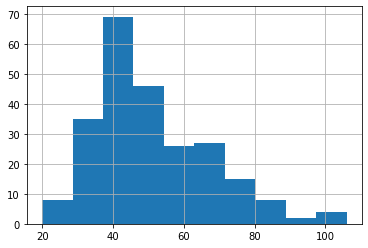

In [34]:
new['goals'].hist()

<AxesSubplot:>

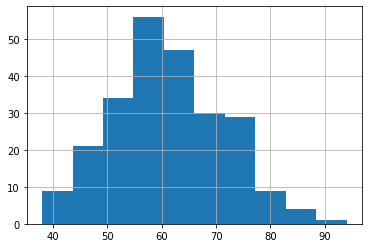

In [33]:
new['yellow cards'].hist()

<AxesSubplot:>

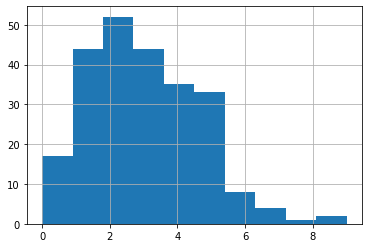

In [35]:
new['red cards'].hist()

<AxesSubplot:>

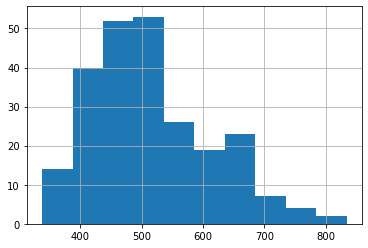

In [39]:
new['shots'].hist()

<AxesSubplot:>

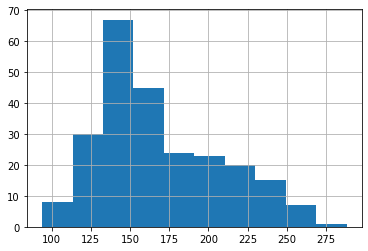

In [37]:
new['shots on target'].hist()

<AxesSubplot:>

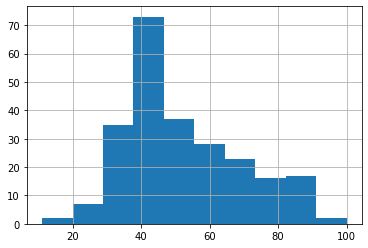

In [40]:
new['points'].hist()

<AxesSubplot:ylabel='points'>

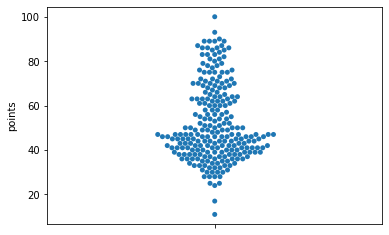

In [43]:
sns.swarmplot(data=new, y= new['points'])

<AxesSubplot:>

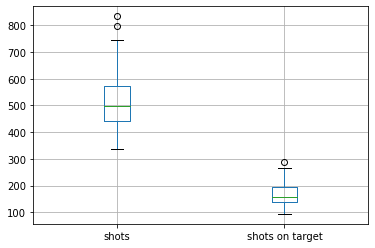

In [45]:
new.boxplot(column = ['shots','shots on target'])

## Here we'll look at 1st places by teams, goals by teams, and breakdown the team comparisons

<AxesSubplot:xlabel='team', ylabel='wins'>

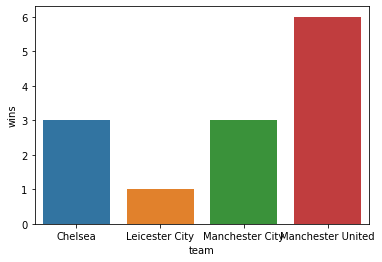

In [77]:
trophies = new.loc[new['rank'] == 20]
totalwins = trophies.groupby(['team']).count()

sns.barplot(x=totalwins.index, y=totalwins['wins'])

In [81]:
aggPerTeam = new.groupby(['team']).sum()
aggPerTeam

,wins,losses,goals,yellow cards,red cards,shots,shots on target,hit woodwork,goals from header,goals from penalty,...,touches,big chances missed,clearances off line,dispossessed,penalties saved,high claims,punches,draws,points,rank
team,,,,,,,,,,,,,,,,,,,,,
AFC Bournemouth,34.0,50.0,145.0,160.0,5.0,1381.0,461.0,37.0,20.0,13.0,...,73726.0,80.0,12.0,1268.0,5.0,131.0,53.0,30.0,132.0,30.0
Arsenal,255.0,94.0,861.0,685.0,40.0,7339.0,2652.0,206.0,143.0,52.0,...,347034.0,480.0,41.0,6011.0,11.0,678.0,269.0,107.0,872.0,208.0
Aston Villa,113.0,150.0,449.0,651.0,26.0,4561.0,1467.0,101.0,89.0,36.0,...,221450.0,202.0,59.0,3976.0,5.0,585.0,231.0,117.0,456.0,92.0
Birmingham City,29.0,48.0,121.0,201.0,7.0,1267.0,419.0,24.0,19.0,10.0,...,64871.0,30.0,20.0,1371.0,1.0,226.0,67.0,37.0,124.0,17.0
Blackburn Rovers,72.0,97.0,277.0,411.0,28.0,2876.0,927.0,70.0,65.0,22.0,...,127563.0,81.0,42.0,2076.0,8.0,327.0,156.0,59.0,275.0,53.0
Blackpool,10.0,19.0,55.0,47.0,2.0,531.0,161.0,11.0,8.0,7.0,...,23616.0,46.0,16.0,499.0,0.0,49.0,29.0,9.0,39.0,3.0
Bolton Wanderers,68.0,109.0,264.0,413.0,20.0,2966.0,922.0,55.0,52.0,19.0,...,125286.0,67.0,44.0,2298.0,8.0,287.0,126.0,51.0,255.0,46.0
Brighton and Hove Albion,9.0,16.0,34.0,54.0,2.0,384.0,119.0,8.0,7.0,5.0,...,21668.0,30.0,10.0,296.0,2.0,38.0,14.0,13.0,40.0,6.0
Burnley,40.0,75.0,145.0,251.0,6.0,1658.0,526.0,41.0,28.0,13.0,...,85703.0,67.0,26.0,1547.0,7.0,197.0,75.0,37.0,157.0,24.0


<AxesSubplot:xlabel='wins', ylabel='team'>

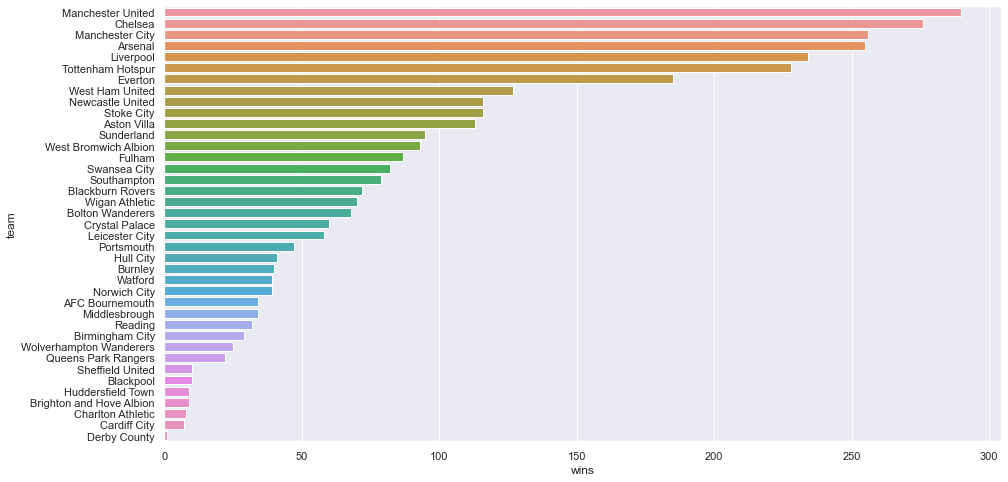

In [100]:
winsPer = aggPerTeam['wins'].sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=winsPer, y=winsPer.index)

<AxesSubplot:xlabel='goals', ylabel='team'>

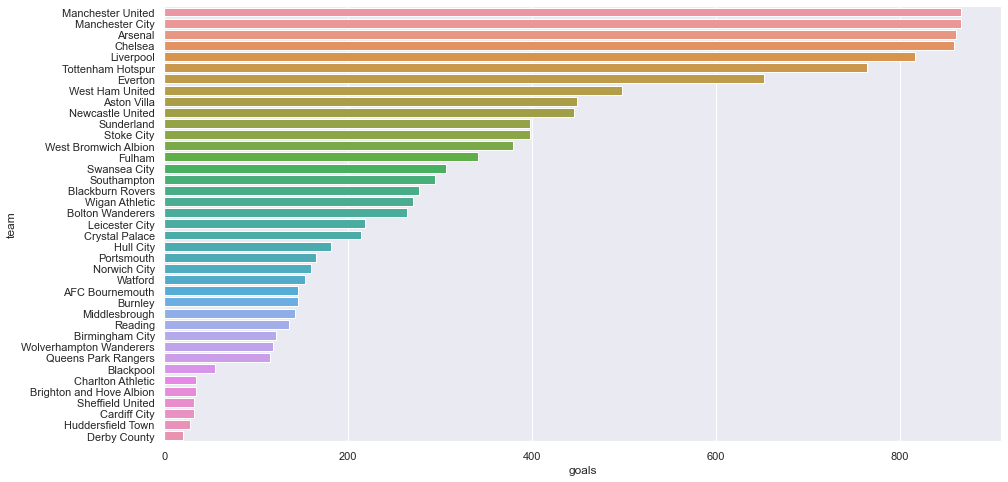

In [101]:
goalsPer = aggPerTeam['goals'].sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=goalsPer, y=goalsPer.index)

<AxesSubplot:xlabel='losses', ylabel='team'>

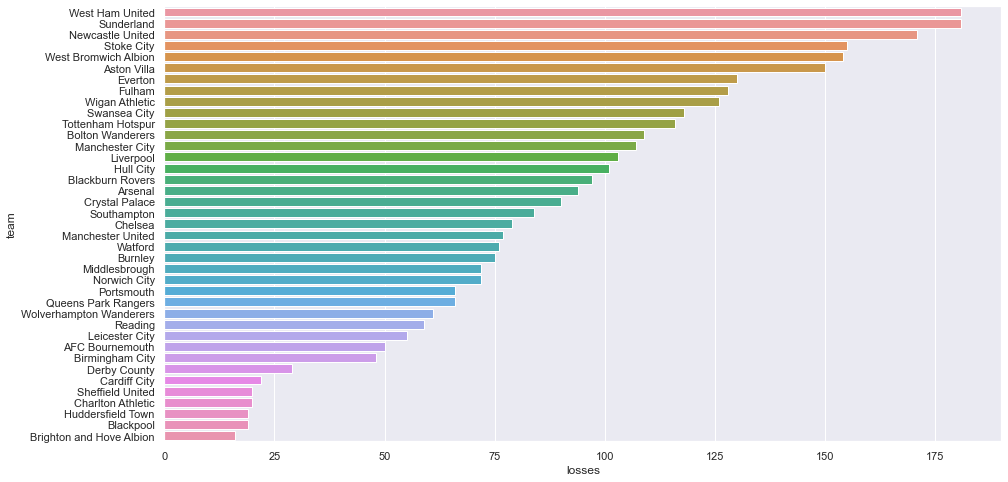

In [102]:
lossesPer = aggPerTeam['losses'].sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=lossesPer, y=lossesPer.index)

<AxesSubplot:xlabel='red cards', ylabel='team'>

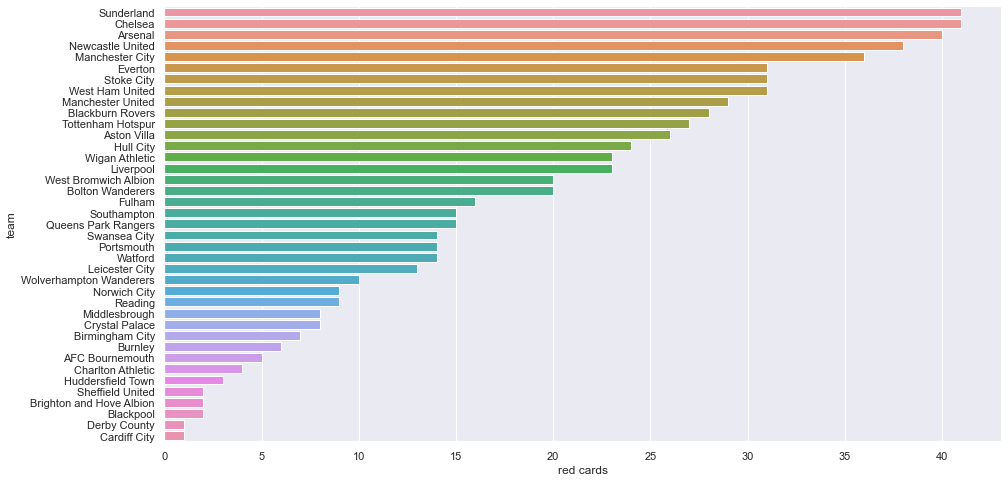

In [103]:
rCardsPer = aggPerTeam['red cards'].sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=rCardsPer, y=rCardsPer.index)

<AxesSubplot:xlabel='rank', ylabel='team'>

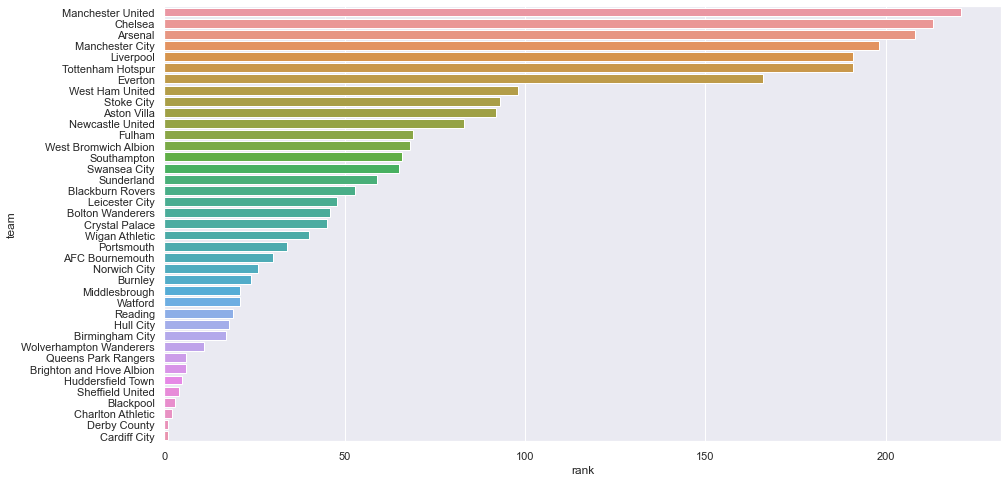

In [104]:
rankPer = aggPerTeam['rank'].sort_values(ascending = False)
sns.set(rc = {'figure.figsize':(15,8)})
sns.barplot(x=rankPer, y=rankPer.index)

## Now let's look at the overall correlations 

In [8]:
#Looking at the correlations of each of the columns to rank
new.corr()

,wins,losses,goals,yellow cards,red cards,shots,shots on target,hit woodwork,goals from header,goals from penalty,...,touches,big chances missed,clearances off line,dispossessed,penalties saved,high claims,punches,draws,points,rank
wins,1.000000,-0.890199,0.899236,-0.211276,-0.084818,0.753944,0.825577,0.512426,0.354752,0.398314,...,0.704645,0.604178,-0.316998,0.260774,-0.032365,-0.162252,0.007351,-0.377727,0.988973,0.929683
losses,-0.890199,1.000000,-0.825820,0.235155,0.116112,-0.710323,-0.775273,-0.490826,-0.373599,-0.379356,...,-0.656575,-0.635046,0.293553,-0.273270,0.017236,0.147711,-0.010721,-0.085569,-0.947851,-0.916190
goals,0.899236,-0.825820,1.000000,-0.235392,-0.084373,0.788062,0.882988,0.564536,0.442670,0.492004,...,0.733838,0.650628,-0.268003,0.269028,-0.000698,-0.222321,0.017450,-0.288203,0.897552,0.826361
yellow cards,-0.211276,0.235155,-0.235392,1.000000,0.033770,-0.253648,-0.265842,-0.128863,-0.089670,-0.095150,...,-0.246781,-0.248291,-0.047345,-0.137412,-0.014418,0.094843,-0.073962,-0.015875,-0.224250,-0.234639
red cards,-0.084818,0.116112,-0.084373,0.033770,1.000000,-0.028250,-0.094543,-0.127432,-0.014242,0.038967,...,-0.067673,0.032303,0.112337,-0.001112,0.062797,0.037623,0.089275,-0.050494,-0.097083,-0.101720
shots,0.753944,-0.710323,0.788062,-0.253648,-0.028250,1.000000,0.938888,0.605026,0.271458,0.353282,...,0.711154,0.726253,-0.174188,0.424606,-0.003246,-0.101241,0.138381,-0.205190,0.758362,0.704449
shots on target,0.825577,-0.775273,0.882988,-0.265842,-0.094543,0.938888,1.000000,0.626005,0.311790,0.395763,...,0.767850,0.735622,-0.225950,0.373564,-0.005862,-0.166715,0.096687,-0.229843,0.829589,0.771285
hit woodwork,0.512426,-0.490826,0.564536,-0.128863,-0.127432,0.605026,0.626005,1.000000,0.236210,0.191067,...,0.531672,0.587715,-0.128247,0.162003,0.042172,-0.178729,-0.049829,-0.123104,0.518044,0.485551
goals from header,0.354752,-0.373599,0.442670,-0.089670,-0.014242,0.271458,0.311790,0.236210,1.000000,0.132276,...,0.173216,0.219387,-0.075413,0.108598,0.017676,-0.048019,-0.115129,-0.016527,0.369629,0.349992
goals from penalty,0.398314,-0.379356,0.492004,-0.095150,0.038967,0.353282,0.395763,0.191067,0.132276,1.000000,...,0.244434,0.308450,-0.094283,0.146317,0.020114,-0.017222,0.127869,-0.100097,0.401976,0.390419


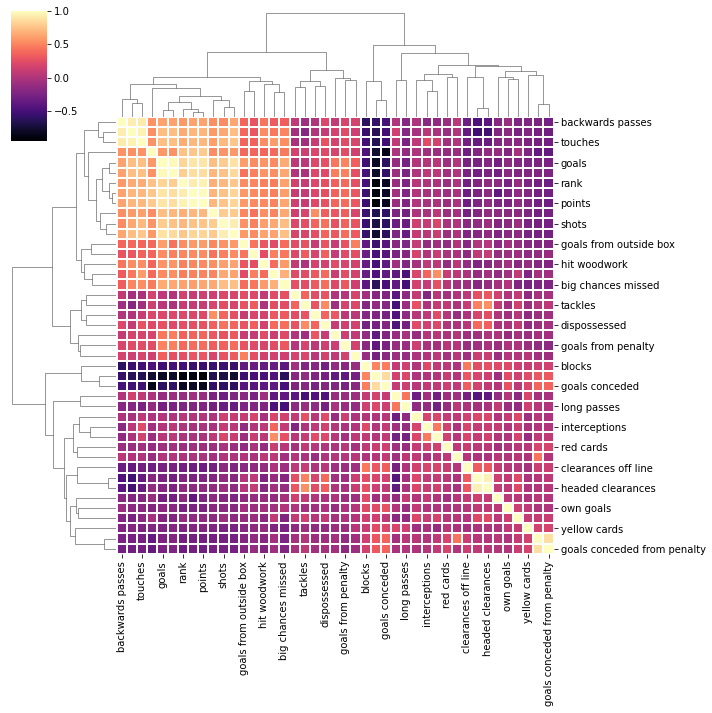

In [9]:
#Heatmap of the data
sns.clustermap(new.corr(),cmap='magma',linecolor='white',linewidth = .1)

## Let's look at the top 5 and the bottom 5 reasons by correlation to rank per season 

In [10]:
#finding the top 5 correlation and finding the bottom 5 correlation for each season.
#We are purposely excluding correlations to points, rank, and wins since those have direction input into how ranking is found. 

#We will analyze these data first by season and then aggregate at the end. 
d={}

for season in seasons:
    d['season'+season] = pd.DataFrame()
    d['season'+season] = new.loc[season]
    
top5list = []
bot5list = []

for season in seasons:
    top5 = d['season'+season].corr()['rank'].rank(ascending=False).sort_values()[3:8]
    bot5 = d['season'+season].corr()['rank'].rank(ascending=False).sort_values()[-5:]
    
    print("For the season " + season + " the top 5 correlations to winning are: " )
    print(top5)
    print()
    top5list.append(top5)
    
    print("For the season " + season + " the bottom 5 correlations to winning are: ")
    print(bot5)
    print()
    bot5list.append(bot5)

For the season 2006-2007 the top 5 correlations to winning are: 
goals                    4.0
goals from inside box    5.0
touches                  6.0
passes                   7.0
shots on target          8.0
Name: rank, dtype: float64

For the season 2006-2007 the bottom 5 correlations to winning are: 
headed clearances    NaN
through balls        NaN
backwards passes     NaN
big chances missed   NaN
dispossessed         NaN
Name: rank, dtype: float64

For the season 2007-2008 the top 5 correlations to winning are: 
goals                    4.0
shots on target          5.0
clean sheets             6.0
shots                    7.0
goals from inside box    8.0
Name: rank, dtype: float64

For the season 2007-2008 the bottom 5 correlations to winning are: 
blocks                39.0
goals conceded        40.0
losses                41.0
backwards passes       NaN
big chances missed     NaN
Name: rank, dtype: float64

For the season 2008-2009 the top 5 correlations to winning are: 
clean s

In [11]:
#Creating a pandas dataframe of the above data to value_count the top 5 and bottom 5 reasons for winning. 
#It is interesting to note that though wins in a frequent top 5 reason, we see that losing isn't actually the lowest.
#We can also wee 

top5s = []
bot5s = []

#top5s in a list
i=0
while i <= 11:
        j=0
        while j <= 4:
            top5s.append(top5list[i].index[j])
            j+=1
        i+=1

#bot5s in a list
i=0
while i <= 11:
        j=0
        while j <= 4:
            bot5s.append(bot5list[i].index[j])
            j+=1
        i+=1

#Converting to dataframe
top5s = pd.DataFrame(top5s)
bot5s = pd.DataFrame(bot5s)

print("TOP REASONS ")
print(top5s.value_counts())
print()
print("BOTTOM REASONS ")
print(bot5s.value_counts())

TOP REASONS 
goals                        12
goals from inside box        12
shots on target              10
clean sheets                  8
shots                         5
touches                       4
big chances missed            2
corners taken                 2
passes                        2
goals from counter attack     1
goals from outside box        1
hit woodwork                  1
dtype: int64

BOTTOM REASONS 
losses                         11
goals conceded                 11
blocks                          7
clearances                      5
backwards passes                4
saves                           4
big chances missed              4
long passes                     2
penalties conceded              2
goals conceded from penalty     2
headed clearances               2
high claims                     1
draws                           1
dispossessed                    1
red cards                       1
clearances off line             1
through balls                

In [12]:
#Top5 and Bot5 correlations for 2006/07 - 2017/18 period
top5All = new.corr()['rank'].rank(ascending=False).sort_values()[3:8]
bot5All = new.corr()['rank'].rank(ascending=False).sort_values()[-5:]

print(top5All)
print()
print(bot5All)

goals                    4.0
goals from inside box    5.0
shots on target          6.0
clean sheets             7.0
shots                    8.0
Name: rank, dtype: float64

clearances off line            39.0
goals conceded from penalty    40.0
blocks                         41.0
goals conceded                 42.0
losses                         43.0
Name: rank, dtype: float64


When comparing with the seasonal data, we see that the top 5 correlations align with what we found in the seasonal data.
However with the bottom 5, we see that those don't perfectly align. 
Goals conceded from penalty has the 4th highest negative correlation, but only appears once as the bottom 5 per season.
Similar case with clearances off line.
We will explore that further.

First, we'll dive into what top reasons that cause a winning record or top finishing rank.
We will be looking at total of 5 columns. Goals, Goals from inside box, shots on target, clean sheets, shots.

Next, we'll explore the inconsistency in the seasonal based rankings and the overall based rankings on losing reasons.

# Here's we'll exploring the winning reasons 

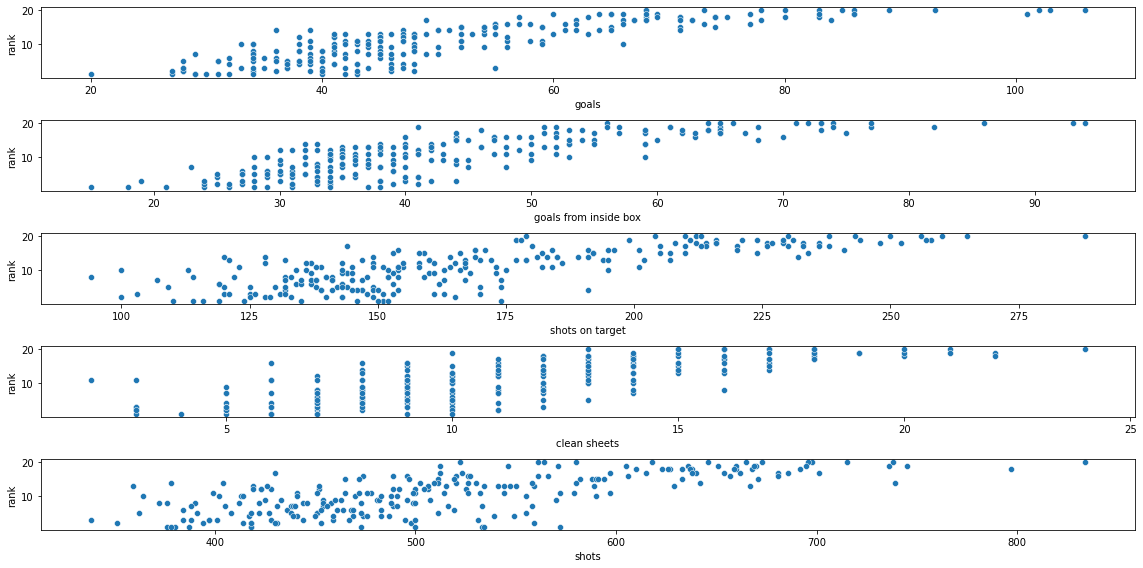

In [14]:
#Graph the scatter with each of the columns vs rank
fig, axes = plt.subplots(5,1, figsize = (16,8))

sns.scatterplot(ax=axes[0], data = new, x='goals', y='rank')
sns.scatterplot(ax=axes[1], data = new, x='goals from inside box', y='rank')
sns.scatterplot(ax= axes[2], data = new, x='shots on target', y='rank')
sns.scatterplot(ax=axes[3], data = new, x='clean sheets', y='rank')
sns.scatterplot(ax=axes[4], data = new, x='shots', y='rank')
plt.tight_layout()

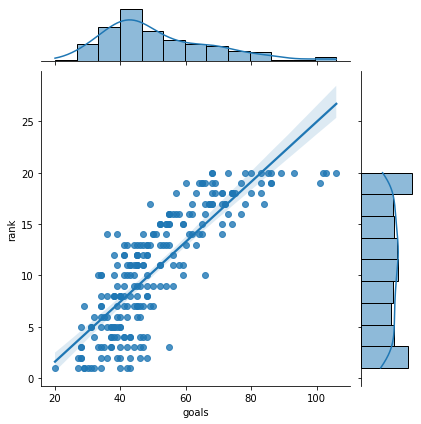

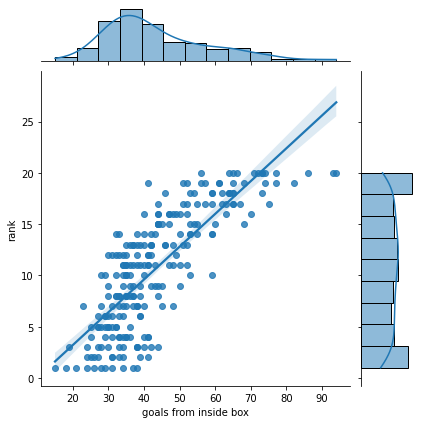

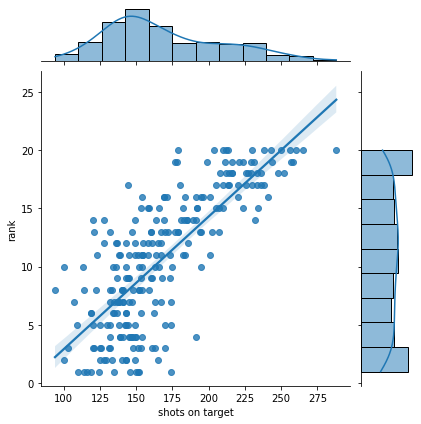

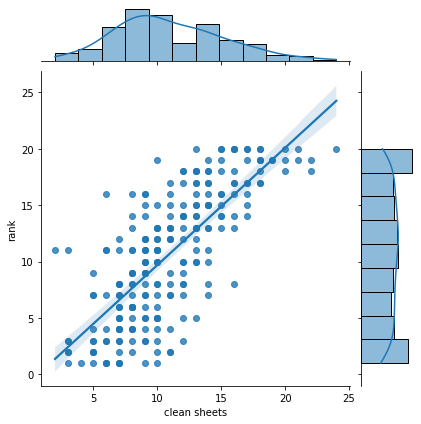

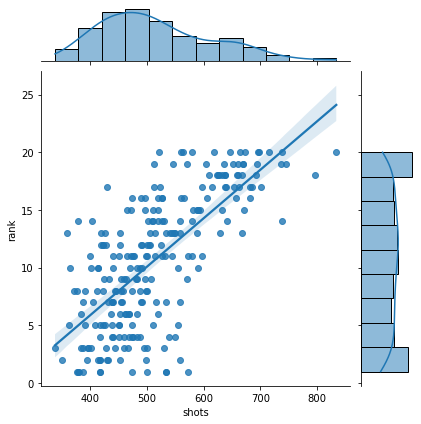

In [15]:
#Jointplot of the distributions

sns.jointplot(data = new, x='goals', y='rank', kind='reg')
sns.jointplot(data = new, x='goals from inside box', y='rank', kind='reg')
sns.jointplot(data = new, x='shots on target', y='rank', kind='reg')
sns.jointplot(data = new, x='clean sheets', y='rank', kind='reg')
sns.jointplot(data = new, x='shots', y='rank', kind='reg')


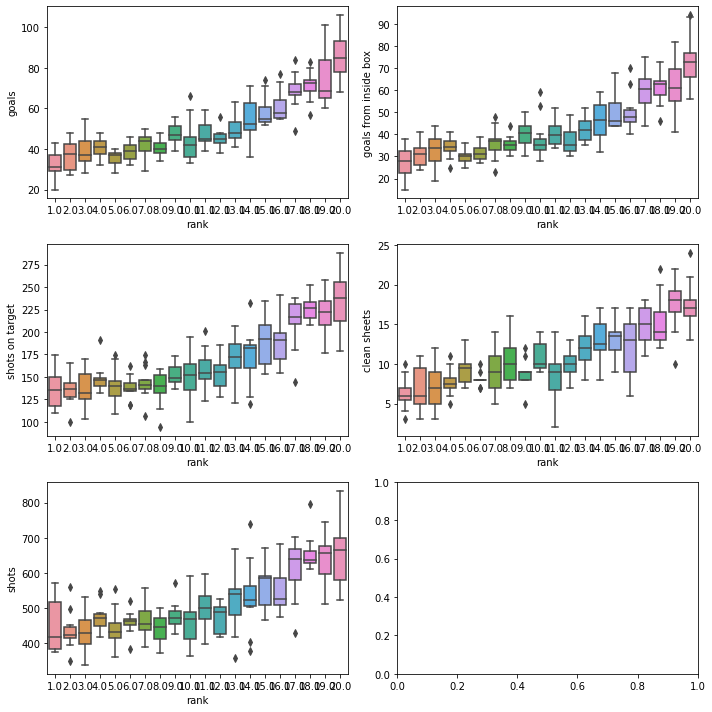

In [16]:
#Outliers
fig, axes = plt.subplots(3,2, figsize = (10,10))

sns.boxplot(ax = axes[0,0], x='rank', y='goals', data = new)
sns.boxplot(ax = axes[0,1], x='rank', y='goals from inside box', data = new)
sns.boxplot(ax = axes[1,0], x='rank', y='shots on target', data = new)
sns.boxplot(ax = axes[1,1], x='rank', y='clean sheets', data = new)
sns.boxplot(ax = axes[2,0], x='rank', y='shots', data = new)
plt.tight_layout()

In [17]:
#Correlation 
rankgoal = new['rank'].corr(new['goals'])
rankgoalbox = new['rank'].corr(new['goals from inside box'])
rankshottarg = new['rank'].corr(new['shots on target'])
rankcleansheet = new['rank'].corr(new['clean sheets'])
rankshots = new['rank'].corr(new['shots'])

top5corr = [rankgoal, rankgoalbox, rankshottarg, rankcleansheet, rankshots]
top5corr

[0.8263605124986337,
 0.8004746599343723,
 0.7712854005987881,
 0.7541108468321387,
 0.7044489204379911]

# Finally, we'll look at the losing reasons, look at correlation, and see if there's an explanation

In [18]:
#Now we'll look deeper into goals conceded from penalty and clearance off line
#Clearance off line only appears once in 2013-2014
#Goals conceded from penalty only appear twice in 2012-2013 and 2015-2016

#Let's first look at goals conceded from penalty from 2012-2013 and 2015-2016 and compare it to the overall correlation.
penCorr = {}
for season in seasons:
    temp = new.loc[season]['rank'].corr(new.loc[season]['goals conceded from penalty'])
    penCorr.update({season:temp})

clearancecorr = {}
for season in seasons:
    temp = new.loc[season]['rank'].corr(new.loc[season]['clearances off line'])
    clearancecorr.update({season:temp})

In [19]:
#Overall goals conceded from penalty correlation to rank is -.32. While the minimum during seasons at 2015-16 is -.57.
penCorr

{'2006-2007': -0.3980276581590096,
 '2007-2008': -0.4571224382863231,
 '2008-2009': -0.3590930803222294,
 '2009-2010': -0.4060395380477091,
 '2010-2011': -0.07697072825041781,
 '2011-2012': -0.1999520025099468,
 '2012-2013': -0.5735068676675784,
 '2013-2014': -0.30593537530244286,
 '2014-2015': 0.02347594859626203,
 '2015-2016': -0.5838130541588855,
 '2016-2017': -0.24748647534406598,
 '2017-2018': -0.21142034346666513}

In [20]:
#Overall goals conceded from penalty correlation to rank is -.30. While the minimum during seasons at 2015-16 is -.63.
clearancecorr

{'2006-2007': -0.6344096268304774,
 '2007-2008': 0.20809244687695547,
 '2008-2009': -0.2066128845553055,
 '2009-2010': -0.4213527833577805,
 '2010-2011': -0.49754392760095234,
 '2011-2012': -0.16546441743078957,
 '2012-2013': -0.41019678478791644,
 '2013-2014': -0.5659515902679562,
 '2014-2015': -0.546596471422195,
 '2015-2016': 0.02925155830261282,
 '2016-2017': -0.4201644185281937,
 '2017-2018': -0.1207872982308984}

In [21]:
new.corr()['rank'].sort_values()

losses                        -0.916190
goals conceded                -0.832200
blocks                        -0.515435
goals conceded from penalty   -0.317181
clearances off line           -0.299226
penalties conceded            -0.291420
own goals                     -0.266603
long passes                   -0.235729
yellow cards                  -0.234639
clearances                    -0.219876
draws                         -0.171118
headed clearances             -0.153534
high claims                   -0.131065
saves                         -0.114205
red cards                     -0.101720
penalties saved               -0.018268
last man tackles              -0.017325
interceptions                 -0.008820
punches                        0.039333
tackles                        0.109666
offsides                       0.159387
crosses                        0.211829
goals from free kick           0.254515
dispossessed                   0.258220
goals from header              0.349992


In [22]:
#Let's look at little more into the penalties scored per season to find an explanation
totalPenSeason = {}
for season in seasons:
    temp = new.loc[season]['goals conceded from penalty'].sum()
    totalPenSeason.update({season:temp})
    
clearSeason = {}
for season in seasons:
    temp = new.loc[season]['clearances off line'].sum()
    clearSeason.update({season:temp})

C:\Users\seanp\AppData\Local\Temp\ipykernel_15496\1050973430.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(names, rotation=45)


[Text(0, 0, '2006-2007'),
 Text(1, 0, '2007-2008'),
 Text(2, 0, '2008-2009'),
 Text(3, 0, '2009-2010'),
 Text(4, 0, '2010-2011'),
 Text(5, 0, '2011-2012'),
 Text(6, 0, '2012-2013'),
 Text(7, 0, '2013-2014'),
 Text(8, 0, '2014-2015'),
 Text(9, 0, '2015-2016'),
 Text(10, 0, '2016-2017'),
 Text(11, 0, '2017-2018')]

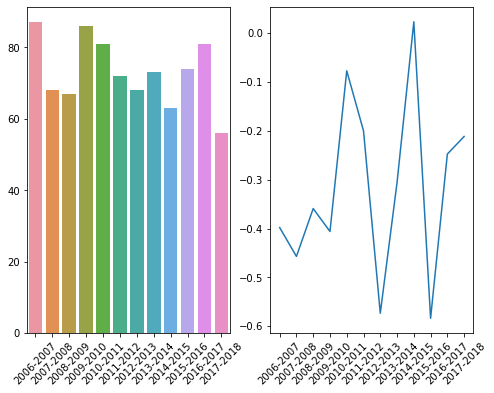

In [23]:
plt, axes = plt.subplots(1,2, figsize = (8,6))

names = list(totalPenSeason.keys())
values = list(totalPenSeason.values())

values2 = list(penCorr.values())


sns.barplot(ax = axes[0], x=names, y=values)
axes[0].set_xticklabels(names, rotation=45)
sns.lineplot(ax = axes[1], x=names, y=values2)
axes[1].set_xticklabels(names, rotation=45)

In [24]:
#Some ending points 
#
#Draw conclusion